### Problem Statement

- Let's assume that you work as a consultant to a start-up company that has just started to hire employees. The HR director reached out to you and asked you to predict the salary of employees based on the number of years of experience. You suggested to use a polynomial regression model to try to create a model using the provided dataset. 
- Image Source: https://pxhere.com/en/photo/1449321

In [1]:
![image.png](attachment:image.png)

zsh:1: number expected


## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Import Data

In [3]:
file_name ="Employee_salary.csv" 
X_label = "Years of Experience"
Y_label = "Salary"
data = pd.read_csv(file_name)

In [4]:

X = data[[X_label]]

Y = data[Y_label]
data.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [6]:
data.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


**lets try to see if any correlation exists between YOE and salary**

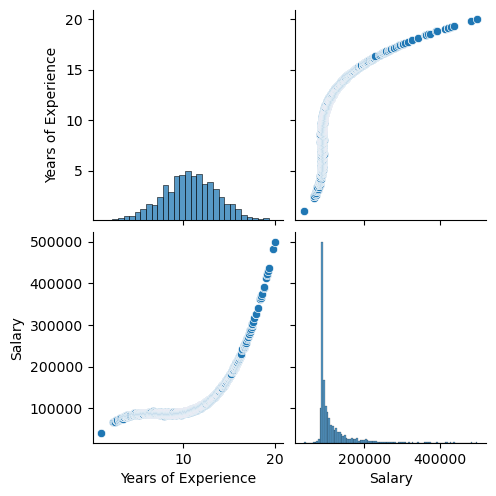

In [7]:
sns.pairplot(data)

In general we can conclude salary increases upto a certain limit with growth in YOE and then plateaus.

In [8]:
sns.lmplot(x =X_label, y =Y_label, data = data)

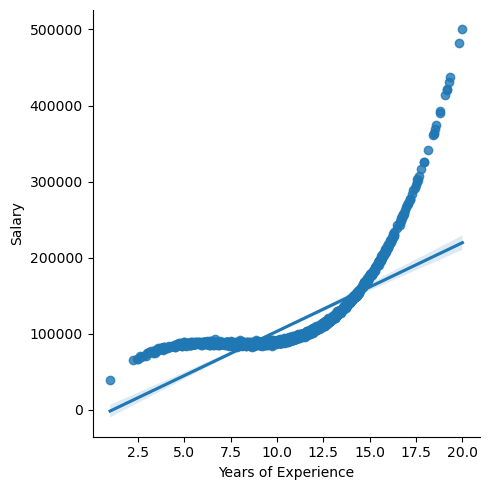

In [9]:
plt.show()

**We tried to see here if a linear line could potentially fit all of the data. However that seems not the case here**

## Split data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [11]:
# since it is a 1 D array
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)

## Assuming Linear Regression model

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [11741.44393328]
Linear Model Coefficient (b):  -14369.072074555035


In [15]:
Y_pred = model.predict(X_train)

**Plotting results of Regression on Training Set**

In [16]:
def plot_model(X, Y, Y_predict, set_type="Training", X_label=X_label, Y_label=Y_label):
    plt.clf()
    plt.scatter(X, Y, color = 'red')
    plt.plot(X, Y_predict, color = 'blue')
    plt.title(f'{X_label} vs {Y_label}({set_type} set)')
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.show()

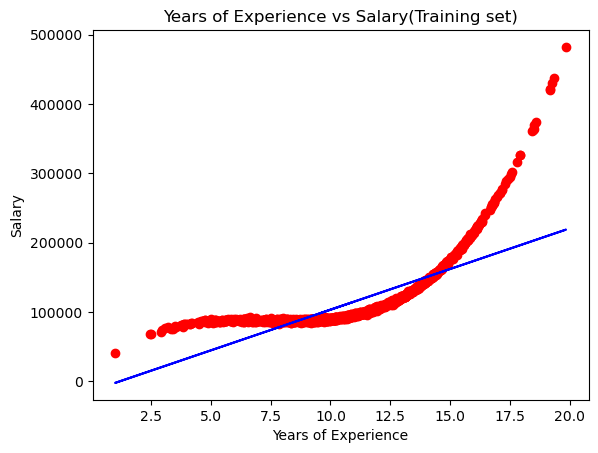

In [17]:
# plt.scatter(X_train, Y_train, color = 'red')
# plt.plot(X_train, model.predict(X_train), color = 'blue')
# plt.title(f'{X_label} vs {Y_label}(Training set)')
# plt.xlabel(X_label)
# plt.ylabel(Y_label)
# plt.show()

plot_model(X_train, Y_train, Y_pred)

**Plotting results of Regression on Test Set**

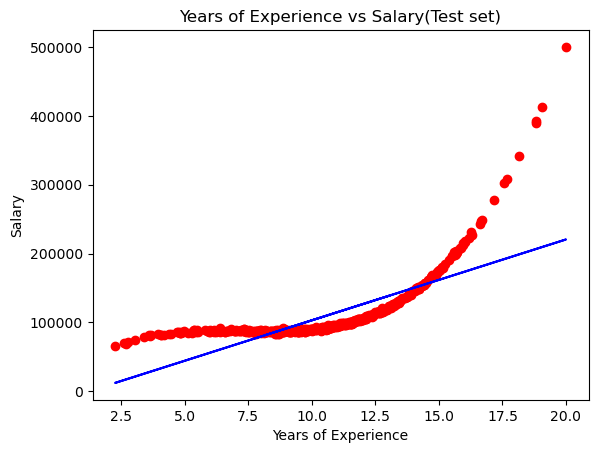

In [18]:
# plt.scatter(X_test, Y_test, color = 'red')
# plt.plot(X_test, model.predict(X_test), color = 'blue')
# plt.title(f'{X_label} vs {Y_label}(Training set)')
# plt.xlabel(X_label)
# plt.ylabel(Y_label)
# plt.show()

Y_pred = model.predict(X_test)
plot_model(X_test, Y_test, Y_pred, "Test")

In [19]:
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

In [20]:
rmse

30343.738091184783

In [21]:
r2Score = r2_score(Y_test,Y_pred)

In [22]:
r2Score

0.5674011189986305

 ## Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
degree = 2

In [25]:
# Transform the matrix of features X into a multi array of features X_Columns 
# which contains the original features and their associated polynomial terms 
poly_regressor = PolynomialFeatures(degree=degree)
X_columns = poly_regressor.fit_transform(X_train)
print(X_columns)

[[  1.          10.88038699 118.38282105]
 [  1.          10.54691009 111.23731245]
 [  1.          13.57704964 184.33627693]
 ...
 [  1.          13.55698336 183.79179782]
 [  1.           9.07425455  82.34209573]
 [  1.           9.56750172  91.5370891 ]]


In [26]:


def create_and_train_poly_model(degree, X_train, Y_train):
    poly_regressor = PolynomialFeatures(degree=degree)
    X_columns = poly_regressor.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_columns, Y_train)
    return model

def poly_model_predict(X, model):
    poly_regressor = PolynomialFeatures(degree=degree)
    X_columns = poly_regressor.fit_transform(X)
    return model.predict(X_columns)

model = create_and_train_poly_model(degree, X_train, Y_train)
Y_predict = poly_model_predict(X_train, model)

In [27]:
print('Model Coefficients: ', model.coef_)

Model Coefficients:  [     0.         -33605.02967855   2111.82236596]


In [28]:
Y_predict.shape

(1500,)

**Plotting results of Regression on Training Set**

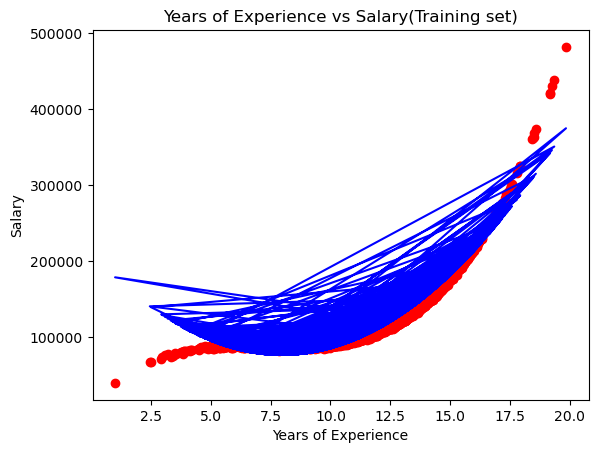

In [29]:
plot_model(X_train, Y_train, Y_predict)

**Plotting results of Regression on Test Set**

In [30]:
Y_predict = poly_model_predict(X_test, model)

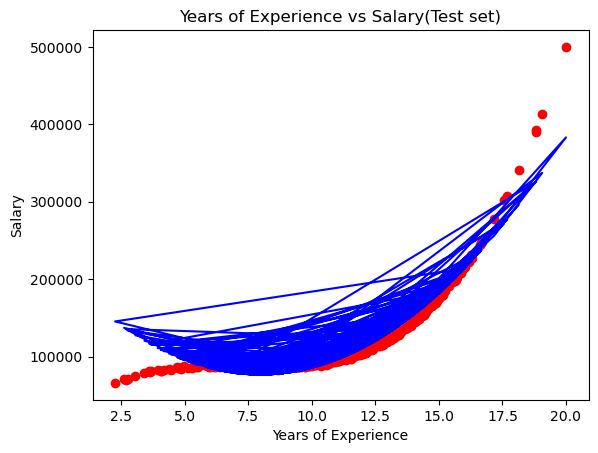

In [31]:
plot_model(X_test, Y_test, Y_predict, "Test")

**Plotting on whole data set**

In [32]:
Y_predict = poly_model_predict(X, model)

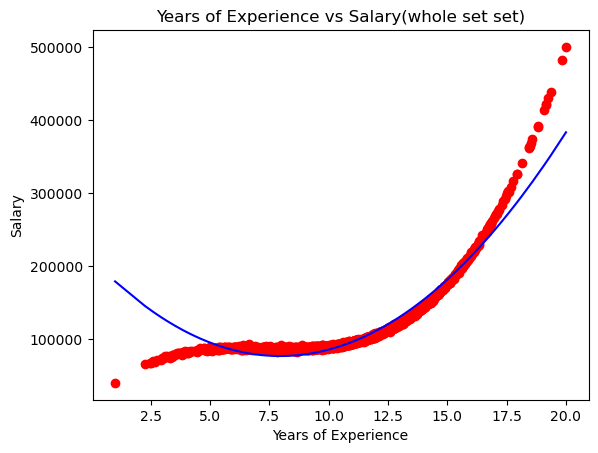

In [33]:
plot_model(X, Y, Y_predict, "whole set")